<a href="https://colab.research.google.com/github/mukejianya/test-ds4ph2025/blob/main/three_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this homework, please return a single ipynb file named hw3.ipynb.




- Download the data. Name it "healthcare_df". Create a plot of healthcare spending versus time color coded by states. The option skiprows = 2 is useful in pd.read_csv for this dataset since there's two lines of metadata at the top of the file.
- Refer to the previous data. Create a barplot using matplotlib of average health care spending by state.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

In [86]:
#read in data from URLs

kirb21_df = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
class_interests_df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4ph-bme/refs/heads/master/data/classInterests.txt", sep='\t')
gene_expression_df = pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/refs/heads/master/data/GSE5859_exprs.csv")
healthcare_df = pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv", skiprows=2)

## Part 1
- Download and read the Kirb21 data into pandas. Name your dataframe "kirb21_df"

- Obtain a dataset for the subject with "rawid" equal to "kirby906a_ax.img". Name it "kirby906a_ax_df" and do the following.
 - Write code to calculate this subject's volume of their type I level I telencephalon (left annd right). Name the variables "telencephalon_L_volume" and "telencephalon_R_volume" such that when printed only the volume is printed (do not make it a dataframe, series, etc. only a number!). Also, find the fractions of the ICV and TBV made up by their telencelphalon. Name the variables "ICV_fraction" and "TBV_fraction" and make sure they are only a number.
  - Create a dataframe that has the sum of all of the regions for every type and level, name it "all_regions_df". So, it should have three columns, type, level and total_volume.
 - Create a bar plot to visualize this subject's Type 1 Level 2 data using seaborn or matplotlib.
 - Create a donut chart in matplotlib of the Type 1 Level 3 ROI data.

In [6]:
kirb21_df.head(2)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519


In [7]:
print(kirb21_df.shape)

(16720, 13)


In [9]:
kirby906a_ax_df = kirb21_df[kirb21_df["rawid"] =='kirby906a_ax.img']

In [49]:
kirby906a_ax_df.head(5)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12540,12541,kirby906a_ax.img,Telencephalon_L,467063,2.0,350.0,165.2599,57.1707,1,1,906,1195015,1123076
12541,12542,kirby906a_ax.img,Telencephalon_R,470488,2.0,337.0,171.8695,59.3001,1,1,906,1195015,1123076
12542,12543,kirby906a_ax.img,Diencephalon_L,8801,60.0,327.0,227.1878,31.2303,1,1,906,1195015,1123076
12543,12544,kirby906a_ax.img,Diencephalon_R,9054,63.0,415.0,231.6770,31.1780,1,1,906,1195015,1123076
12544,12545,kirby906a_ax.img,Mesencephalon,9564,86.0,352.0,269.1003,28.6454,1,1,906,1195015,1123076


In [11]:
print(kirby906a_ax_df.shape)

(836, 13)


In [14]:
telencephalon_df = kirby906a_ax_df[
    ((kirby906a_ax_df["roi"] == 'Telencephalon_L') |
    (kirby906a_ax_df["roi"] == 'Telencephalon_R')) &
    (kirby906a_ax_df["type"] == 1) &
    (kirby906a_ax_df["level"] == 1)
    ]

In [24]:
telencephalon_df

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12540,12541,kirby906a_ax.img,Telencephalon_L,467063,2.0,350.0,165.2599,57.1707,1,1,906,1195015,1123076
12541,12542,kirby906a_ax.img,Telencephalon_R,470488,2.0,337.0,171.8695,59.3001,1,1,906,1195015,1123076


In [28]:
telencephalon_L_volume = telencephalon_df[telencephalon_df['roi'] == 'Telencephalon_L']['volume'].values[0]
telencephalon_R_volume = telencephalon_df[telencephalon_df['roi'] == 'Telencephalon_R']['volume'].values[0]

In [33]:
print(telencephalon_L_volume)
print(telencephalon_R_volume)

467063
470488


In [37]:
icv = telencephalon_df['icv'].values[0]
tbv = telencephalon_df['tbv'].values[0]

In [38]:
ICV_fraction = (telencephalon_L_volume + telencephalon_R_volume) / icv
TBV_fraction = (telencephalon_L_volume + telencephalon_R_volume) / tbv

In [39]:
print(ICV_fraction)
print(TBV_fraction)

0.7845516583473847
0.8348063710737297


In [41]:
print(kirby906a_ax_df['level'].value_counts())
print(kirby906a_ax_df['type'].value_counts())

level
5    474
4    206
3    106
2     37
1     13
Name: count, dtype: int64
type
1    493
2    343
Name: count, dtype: int64


In [42]:
all_regions_df = kirby906a_ax_df.groupby(['type', 'level'])['volume'].sum().reset_index()

In [48]:
all_regions_df

,type,level,volume
0,1,1,1195015
1,1,2,1195021
2,1,3,1195034
3,1,4,1195065
4,1,5,1195124
5,2,1,1195015
6,2,2,1195022
7,2,3,1195032
8,2,4,1195041
9,2,5,1195092


In [53]:
kirby906a_ax_df_t1l2 = kirby906a_ax_df[
    (kirby906a_ax_df["type"] == 1) &
    (kirby906a_ax_df["level"] == 2)
    ]

kirby906a_ax_df_t1l3 = kirby906a_ax_df[
    (kirby906a_ax_df["type"] == 1) &
    (kirby906a_ax_df["level"] == 3)
    ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'CerebralCortex_L'),
  Text(1, 0, 'CerebralCortex_R'),
  Text(2, 0, 'CerebralNucli_L'),
  Text(3, 0, 'CerebralNucli_R'),
  Text(4, 0, 'Thalamus_L'),
  Text(5, 0, 'Thalamus_R'),
  Text(6, 0, 'BasalForebrain_L'),
  Text(7, 0, 'BasalForebrain_R'),
  Text(8, 0, 'Mesencephalon_L'),
  Text(9, 0, 'Mesencephalon_R'),
  Text(10, 0, 'Metencephalon_R'),
  Text(11, 0, 'Metencephalon_L'),
  Text(12, 0, 'Myelencephalon_L'),
  Text(13, 0, 'Myelencephalon_R'),
  Text(14, 0, 'WhiteMatter_L'),
  Text(15, 0, 'WhiteMatter_R'),
  Text(16, 0, 'Ventricle'),
  Text(17, 0, 'Sulcus_L'),
  Text(18, 0, 'Sulcus_R')])

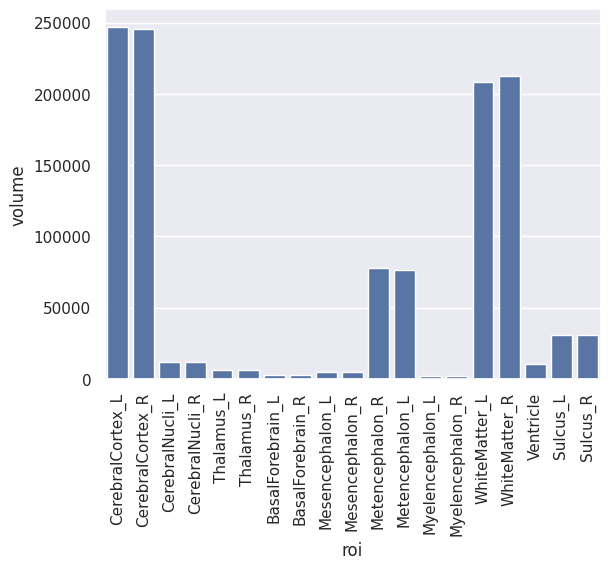

In [54]:
barplot1 = sns.barplot(x='roi', y='volume', data=kirby906a_ax_df_t1l2)
plt.xticks(rotation=90)

In [62]:
kirby906a_ax_df_t1l3.head(2)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12567,12568,kirby906a_ax.img,Frontal_L,79044,2.0,276.0,115.186,32.1059,1,3,906,1195015,1123076
12568,12569,kirby906a_ax.img,Frontal_R,75534,7.0,278.0,114.827,29.2461,1,3,906,1195015,1123076


In [63]:
kirby906a_ax_df_t1l3.shape

(54, 13)

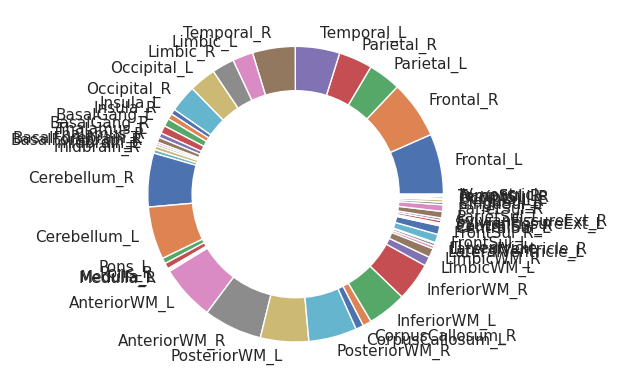

In [64]:
plt.pie(kirby906a_ax_df_t1l3['volume'], labels=kirby906a_ax_df_t1l3['roi'])


# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## Part 2
- Read in the class data. Name it "class_interests_df". Create a single bar plot of student counts by year and program using seaborn.

In [ ]:
# Create a single bar plot of student counts by year and program using seaborn.
class_interests_df.head(2)

,Year,Program
0,Master's,BME
1,Master's,BME


In [70]:
class_summary = class_interests_df.groupby(['Year', 'Program']).value_counts().reset_index()

In [71]:
class_summary

,Year,Program,count
0,Junior,BME,3
1,Master's,BME,29
2,Master's,ChemBE,1
3,Master's,JHSPH-MMI,1
4,Master's,Materials_Science,1
5,PhD,BCMB_SOM,1
6,PhD,BME,1
7,PhD,Computer_Science,1
8,Senior,BME,1
9,Senior,ChemBE,1


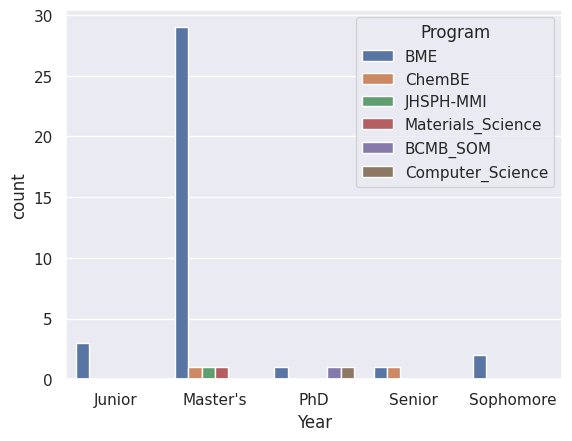

In [74]:
barplot = sns.barplot(x='Year', y='count', hue='Program', data=class_summary)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'BME'),
  Text(1, 0, 'ChemBE'),
  Text(2, 0, 'JHSPH-MMI'),
  Text(3, 0, 'Materials_Science'),
  Text(4, 0, 'BCMB_SOM'),
  Text(5, 0, 'Computer_Science')])

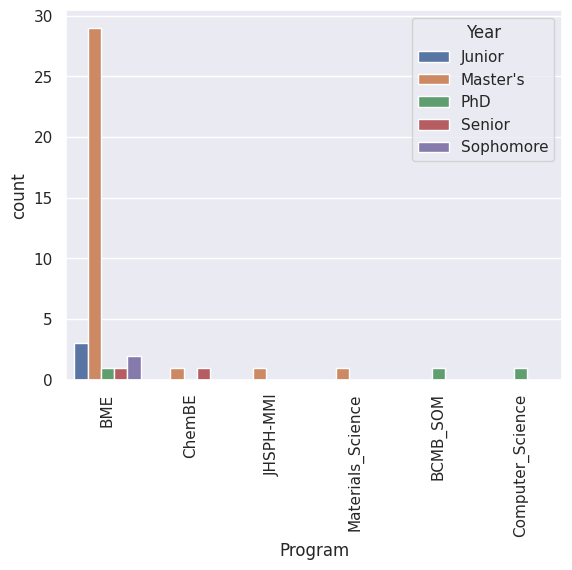

In [77]:
barplot = sns.barplot(x='Program', y='count', hue='Year', data=class_summary)
plt.xticks(rotation=90)

## Part 3

- Download the gene expression dataset. Name it "gene_expression_df". Information about the data can be found in the sample info here. Do the following operations in order on the gene expression matrix (please note that 2 uses the matrix created in 1 and 3 uses the matrix created in 2):
 1. subtract the rowmean from each row (name it "gene_expression_df_pt1")
 2. take the resulting matrix and subtract the column mean from each column (name it "gene_expression_df_pt2")
 3. Take the resulting matrix and divide each column by the column's standard deviation (name it "gene_expression_df_p

In [87]:
gene_expression_df.head(2)

,Unnamed: 0,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,1007_s_at,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1,1053_at,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410


In [84]:
gene_expression_df.shape

(8793, 210)

In [96]:
gene_expression_df_pt1 = gene_expression_df.select_dtypes(include=np.number) #Select numerical columns

In [93]:
row_mean = gene_expression_df_pt1.mean(axis=1)

In [99]:
row_mean.head(3)

,0
0,6.383263
1,7.091630
2,5.477032


In [97]:
gene_expression_df_pt1 = gene_expression_df_pt1.subtract(row_mean, axis=0)

In [98]:
gene_expression_df_pt1.head(3)

,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,-0.049313,-0.647073,-0.226509,0.129747,-0.322250,0.123230,0.480163,-0.013618,0.263058,-0.572333,...,0.699373,-0.067397,0.626902,0.076844,-0.260908,-0.052949,0.243751,-0.250195,0.036180,0.105316
1,0.163992,0.308363,0.400337,-0.085507,0.159365,-0.009050,-0.249394,-0.043143,-0.049269,-0.425005,...,-0.491913,0.321100,0.182799,-0.162988,0.077152,0.144017,-0.152446,0.189150,-0.739855,0.425779
2,0.283074,-0.651863,-0.437645,-0.062873,-0.271335,-0.176954,-0.377696,-0.320573,0.259077,0.330464,...,0.754425,-0.236315,-0.201970,0.282794,-0.067313,0.014905,-0.363462,-0.075156,0.060573,-0.229842


In [100]:
col_mean = gene_expression_df_pt1.mean(axis=0)

In [101]:
col_mean.shape

(208,)

In [103]:
gene_expression_df_pt2 = gene_expression_df_pt1.sub(col_mean, axis=1)  # Subtract column means

In [104]:
gene_expression_df_pt2.shape

(8793, 208)

In [105]:
col_std = gene_expression_df_pt2.std(axis=0)

In [106]:
gene_expression_df_pt3 = gene_expression_df_pt2.div(col_std, axis=1)

In [107]:
gene_expression_df_pt3.shape

(8793, 208)

## Part 4

In [111]:
healthcare_df.shape

(64, 25)

In [108]:
healthcare_df.head(3)

,Location,1991__Total Health Spending,1992__Total Health Spending,1993__Total Health Spending,1994__Total Health Spending,1995__Total Health Spending,1996__Total Health Spending,1997__Total Health Spending,1998__Total Health Spending,1999__Total Health Spending,...,2005__Total Health Spending,2006__Total Health Spending,2007__Total Health Spending,2008__Total Health Spending,2009__Total Health Spending,2010__Total Health Spending,2011__Total Health Spending,2012__Total Health Spending,2013__Total Health Spending,2014__Total Health Spending
0,United States,675896.0,731455.0,778684.0,820172.0,869578.0,917540.0,969531.0,1026103.0,1086280.0,...,1696222.0,1804672.0,1918820.0,2010690.0,2114221.0,2194625.0,2272582.0,2365948.0,2435624.0,2562824.0
1,Alabama,10393.0,11284.0,12028.0,12742.0,13590.0,14450.0,15462.0,15860.0,16451.0,...,25338.0,26638.0,27700.0,28765.0,30095.0,30728.0,31398.0,32848.0,33788.0,35263.0
2,Alaska,1458.0,1558.0,1661.0,1728.0,1879.0,2076.0,2240.0,2386.0,2569.0,...,4765.0,5048.0,5426.0,5807.0,6112.0,6519.0,6928.0,7406.0,7684.0,8151.0


In [110]:
healthcare_df.tail(10)

,Location,1991__Total Health Spending,1992__Total Health Spending,1993__Total Health Spending,1994__Total Health Spending,1995__Total Health Spending,1996__Total Health Spending,1997__Total Health Spending,1998__Total Health Spending,1999__Total Health Spending,...,2005__Total Health Spending,2006__Total Health Spending,2007__Total Health Spending,2008__Total Health Spending,2009__Total Health Spending,2010__Total Health Spending,2011__Total Health Spending,2012__Total Health Spending,2013__Total Health Spending,2014__Total Health Spending
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,All health spending is displayed in millions o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Additional information on data and methods is ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,"For additional analysis of these data, please ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"Centers for Medicare & Medicaid Services, Offi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Definitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,*Total Health Spending* includes spending for ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
healthcare_df['Location'].value_counts()

,count
Location,
United States,1
Alabama,1
Alaska,1
Arizona,1
Arkansas,1
...,...
"For additional analysis of these data, please see Health Affairs article, [""Health Spending by State, 1991-2014: Measuring Per Capita Spending by Payer and Programs""](http://content.healthaffairs.org/content/early/2017/06/13/hlthaff.2017.0416).",1
Sources,1
"Centers for Medicare & Medicaid Services, Office of the Actuary, National Health Statistics Group. [National Health Expenditure Data: Health Expenditures by State of Residence](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NationalHealthAccountsStateHealthAccountsResidence.html), June 2017.",1


In [120]:
healthcare_df.iloc[1:52,0]
#states are between #1 and #50 which corresponds to location 2 and 51

,Location
1,Alabama
2,Alaska
3,Arizona
4,Arkansas
5,California
6,Colorado
7,Connecticut
8,Delaware
9,District of Columbia
10,Florida


In [128]:
healthcare_df_statesonly = healthcare_df.iloc[1:52].copy()


In [133]:
healthcare_df_statesonly.head(3)

,Location,1991__Total Health Spending,1992__Total Health Spending,1993__Total Health Spending,1994__Total Health Spending,1995__Total Health Spending,1996__Total Health Spending,1997__Total Health Spending,1998__Total Health Spending,1999__Total Health Spending,...,2006__Total Health Spending,2007__Total Health Spending,2008__Total Health Spending,2009__Total Health Spending,2010__Total Health Spending,2011__Total Health Spending,2012__Total Health Spending,2013__Total Health Spending,2014__Total Health Spending,row_mean
1,Alabama,10393.0,11284.0,12028.0,12742.0,13590.0,14450.0,15462.0,15860.0,16451.0,...,26638.0,27700.0,28765.0,30095.0,30728.0,31398.0,32848.0,33788.0,35263.0,21976.708333
2,Alaska,1458.0,1558.0,1661.0,1728.0,1879.0,2076.0,2240.0,2386.0,2569.0,...,5048.0,5426.0,5807.0,6112.0,6519.0,6928.0,7406.0,7684.0,8151.0,4141.541667
3,Arizona,9269.0,9815.0,10655.0,11364.0,12042.0,12850.0,13418.0,14465.0,15550.0,...,30766.0,33366.0,35547.0,37258.0,38620.0,39295.0,40495.0,41481.0,43356.0,24176.083333


In [132]:
healthcare_df_statesonly.shape

(51, 26)

In [131]:
healthcare_df_statesonly['row_mean'] = healthcare_df_statesonly.select_dtypes(include=np.number).mean(axis=1)

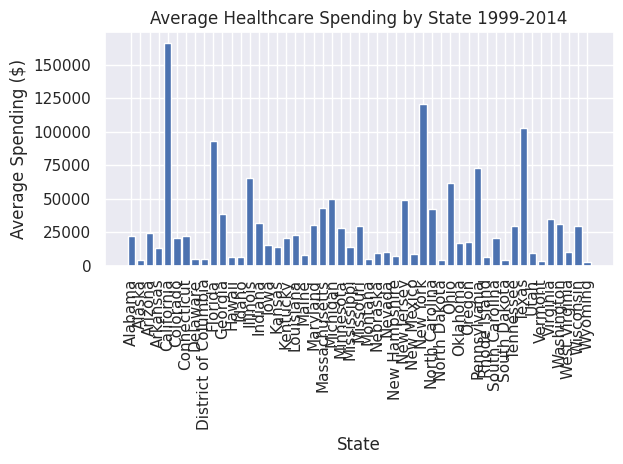

In [141]:
plt.bar(healthcare_df_statesonly['Location'],healthcare_df_statesonly['row_mean'])
plt.xlabel("State")
plt.ylabel("Average Spending ($)")
plt.title("Average Healthcare Spending by State 1999-2014")
plt.xticks(rotation=90)
plt.tight_layout()
